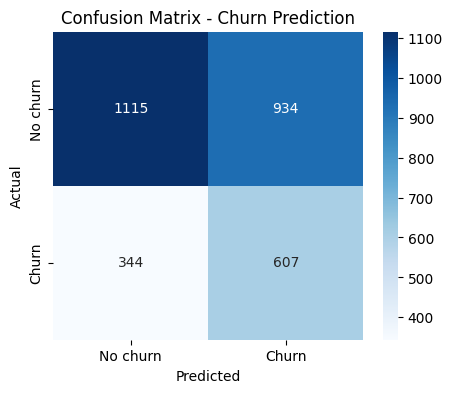

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("../data/churn.csv")

data = df.copy()

data["churn"] = data["churn"].map({"Yes": 1, "No": 0})
data["total_charges"] = pd.to_numeric(data["total_charges"], errors="coerce")
data["total_charges"] = data["total_charges"].fillna(data["total_charges"].median())


data = data.drop(columns=["customer_id"])

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop("churn", axis=1)
y = data_encoded["churn"]


# Model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

plt.figure(figsize=(5, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No churn", "Churn"],
    yticklabels=["No churn", "Churn"],
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()